In [87]:
#Starting off by importing the library 
library(tidyverse)
library(repr)
library(tidymodels)
library(ggplot2)

In [88]:
#Doing this to open up the data
players <- read_csv("players.csv")
sessions <- read_csv("sessions.csv")

head(players)
head(sessions)

Rows: 196 Columns: 7
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (4): experience, hashedEmail, name, gender
dbl (2): played_hours, Age
lgl (1): subscribe

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Rows: 1535 Columns: 5
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (3): hashedEmail, start_time, end_time
dbl (2): original_start_time, original_end_time

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


experience,subscribe,hashedEmail,played_hours,name,gender,Age
<chr>,<lgl>,<chr>,<dbl>,<chr>,<chr>,<dbl>
Pro,TRUE,f6daba428a5e19a3d47574858c13550499be23603422e6a0ee9728f8b53e192d,30.3,Morgan,Male,9
Veteran,TRUE,f3c813577c458ba0dfef80996f8f32c93b6e8af1fa939732842f2312358a88e9,3.8,Christian,Male,17
Veteran,FALSE,b674dd7ee0d24096d1c019615ce4d12b20fcbff12d79d3c5a9d2118eb7ccbb28,0.0,Blake,Male,17
Amateur,TRUE,23fe711e0e3b77f1da7aa221ab1192afe21648d47d2b4fa7a5a659ff443a0eb5,0.7,Flora,Female,21
Regular,TRUE,7dc01f10bf20671ecfccdac23812b1b415acd42c2147cb0af4d48fcce2420f3e,0.1,Kylie,Male,21
Amateur,TRUE,f58aad5996a435f16b0284a3b267f973f9af99e7a89bee0430055a44fa92f977,0.0,Adrian,Female,17


hashedEmail,start_time,end_time,original_start_time,original_end_time
<chr>,<chr>,<chr>,<dbl>,<dbl>
bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f431d8aa0c4bf95ccee6bf,30/06/2024 18:12,30/06/2024 18:24,1.71977e+12,1.71977e+12
36d9cbb4c6bc0c1a6911436d2da0d09ec625e43e6552f575d4acc9cf487c4686,17/06/2024 23:33,17/06/2024 23:46,1.71867e+12,1.71867e+12
f8f5477f5a2e53616ae37421b1c660b971192bd8ff77e3398304c7ae42581fdc,25/07/2024 17:34,25/07/2024 17:57,1.72193e+12,1.72193e+12
bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f431d8aa0c4bf95ccee6bf,25/07/2024 03:22,25/07/2024 03:58,1.72188e+12,1.72188e+12
36d9cbb4c6bc0c1a6911436d2da0d09ec625e43e6552f575d4acc9cf487c4686,25/05/2024 16:01,25/05/2024 16:12,1.71665e+12,1.71665e+12
bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f431d8aa0c4bf95ccee6bf,23/06/2024 15:08,23/06/2024 17:10,1.71916e+12,1.71916e+12


In [89]:
#Number of rows and columns for the data 
tibble(
  dataset = c("players", "sessions"),
  n_rows  = c(nrow(players), nrow(sessions)),
  n_cols  = c(ncol(players), ncol(sessions))
)

#Summary Statistics (using round function to set values around 2 decimal places)
player_summary <- players |>
    summarize(
    mean_played_hours = round(mean(played_hours, na.rm = TRUE), 2),
    min_played_hours = round(min(played_hours, na.rm = TRUE), 2),
    max_played_hours = round(max(played_hours, na.rm = TRUE), 2),
    mean_age = round(mean(Age, na.rm = TRUE), 2),
    min_age = round(min(Age, na.rm = TRUE), 2),
    max_age = round(max(Age, na.rm = TRUE), 2))
player_summary 

dataset,n_rows,n_cols
<chr>,<int>,<int>
players,196,7
sessions,1535,5


mean_played_hours,min_played_hours,max_played_hours,mean_age,min_age,max_age
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
5.85,0,223.1,21.14,9,58


Age,mean_hours
<dbl>,<dbl>
9,30.30
10,3.60
11,2.90
12,0.50
14,8.70
15,0.10
16,50.03
17,4.89
18,0.23


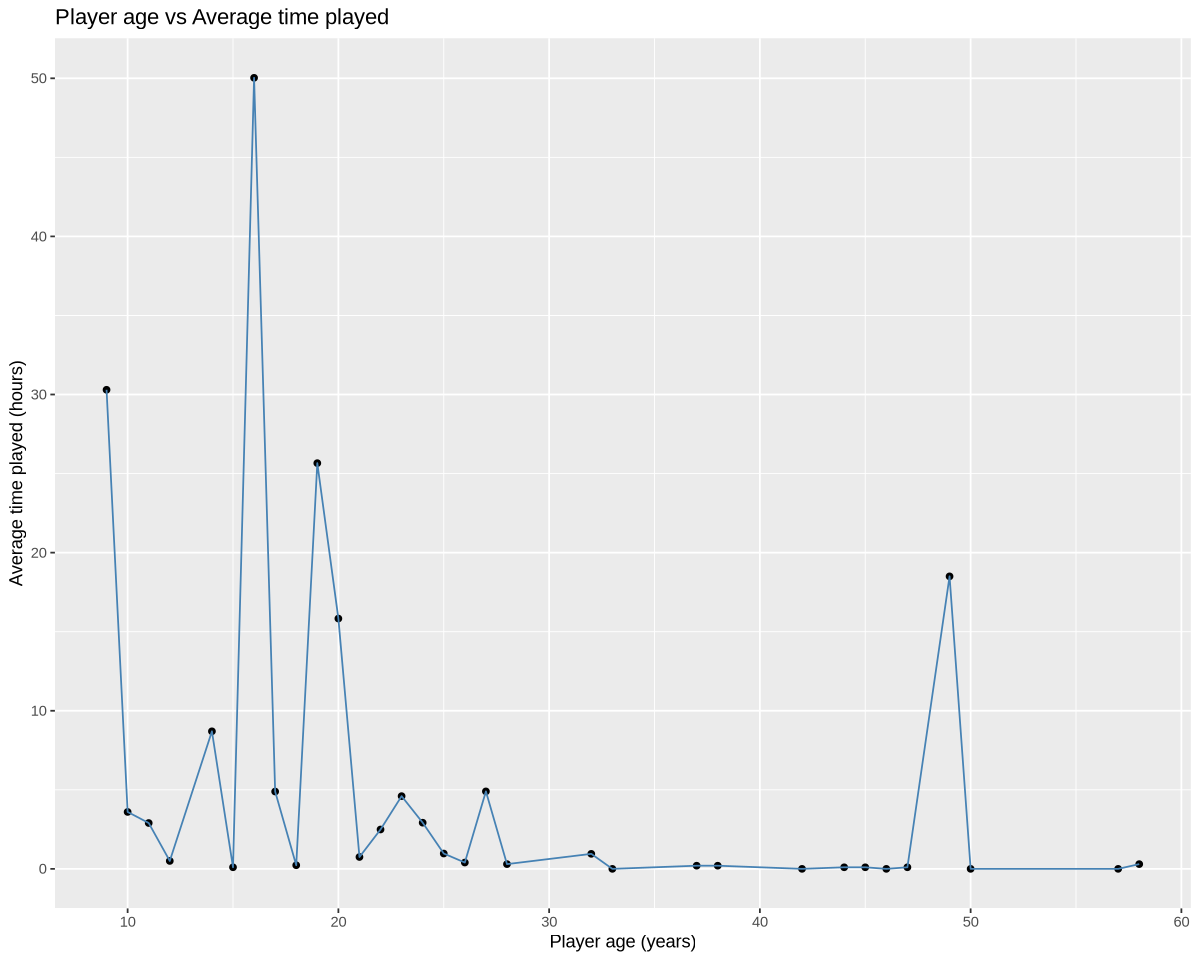

In [90]:
#Start with filtering all data that has the age variable and then find the mean hours
age_summary <- players |>
  filter(!is.na(Age)) |>
  group_by(Age) |>
  summarize(mean_hours = round(mean(played_hours, na.rm = TRUE), 2))
age_summary

#Plot the data in a scatterplot with a line, remove all non permissible data by using na.rm=TRUE
age_plot <- ggplot(age_summary, aes(x=Age, y = mean_hours)) +
            geom_point(na.rm=TRUE)+
            geom_line(color="steelblue", na.rm=TRUE)+
            labs(x= "Player age (years)", y = "Average time played (hours)", title = "Player age vs Average time played")
age_plot

What is the relationship between these two variables?
Based on the plot above, we can see that the highest points on the graph are with individuals between the ages of 10 to 20 years old. Past that specific age group, we can see that the average time played for most groups is below the 20 hour mark. 

gender,mean_hours
<chr>,<dbl>
Agender,6.25000000
Female,10.63513514
Male,4.12741935
Non-binary,14.88000000
Other,0.20000000
Prefer not to say,0.37272727
Two-Spirited,0.08333333


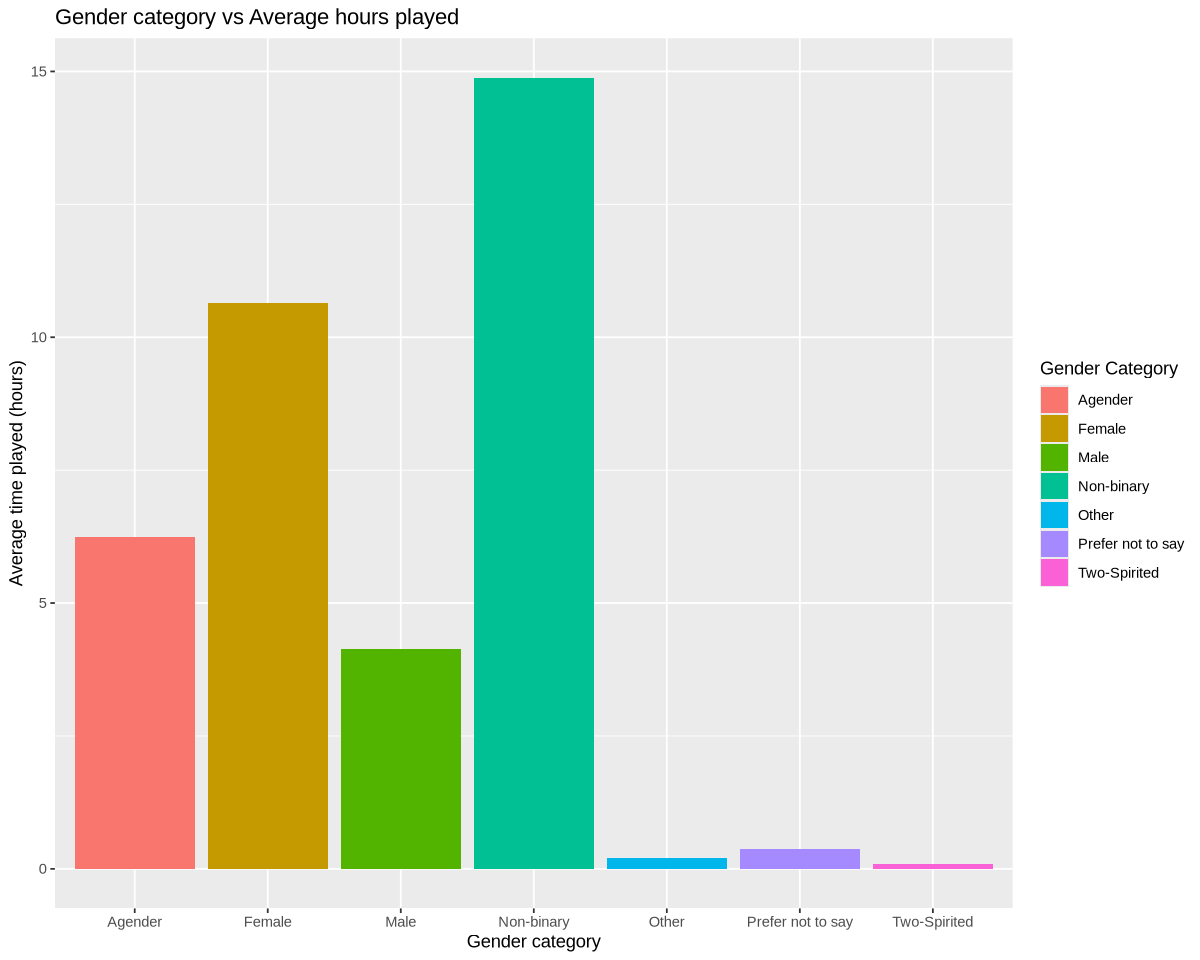

In [91]:
options(repr.plot.width = 10, repr.plot.height = 8)

#Start by grouping the genders and then finding the mean hours played for each gender category
players_gender<- players |>
  group_by(gender) |>
  summarize(mean_hours = mean(played_hours, na.rm = TRUE))
players_gender

#Plotting the data out on a easy to view bar plot
gender_plot <- ggplot(players_gender, aes(x=gender, y= mean_hours, fill = gender)) +
               geom_bar(stat= "identity")+
               labs(x= "Gender category", y = "Average time played (hours)", fill = "Gender Category", title = "Gender category vs Average hours played") 
gender_plot

Based on the plot above, the gender category with the highest average playtime is the non-binary caterogry (Female at 2nd and Agender at third). 

experience,mean_hours_exp
<chr>,<dbl>
Amateur,6.0174603
Beginner,1.2485714
Pro,2.6000000
Regular,18.2083333
Veteran,0.6479167


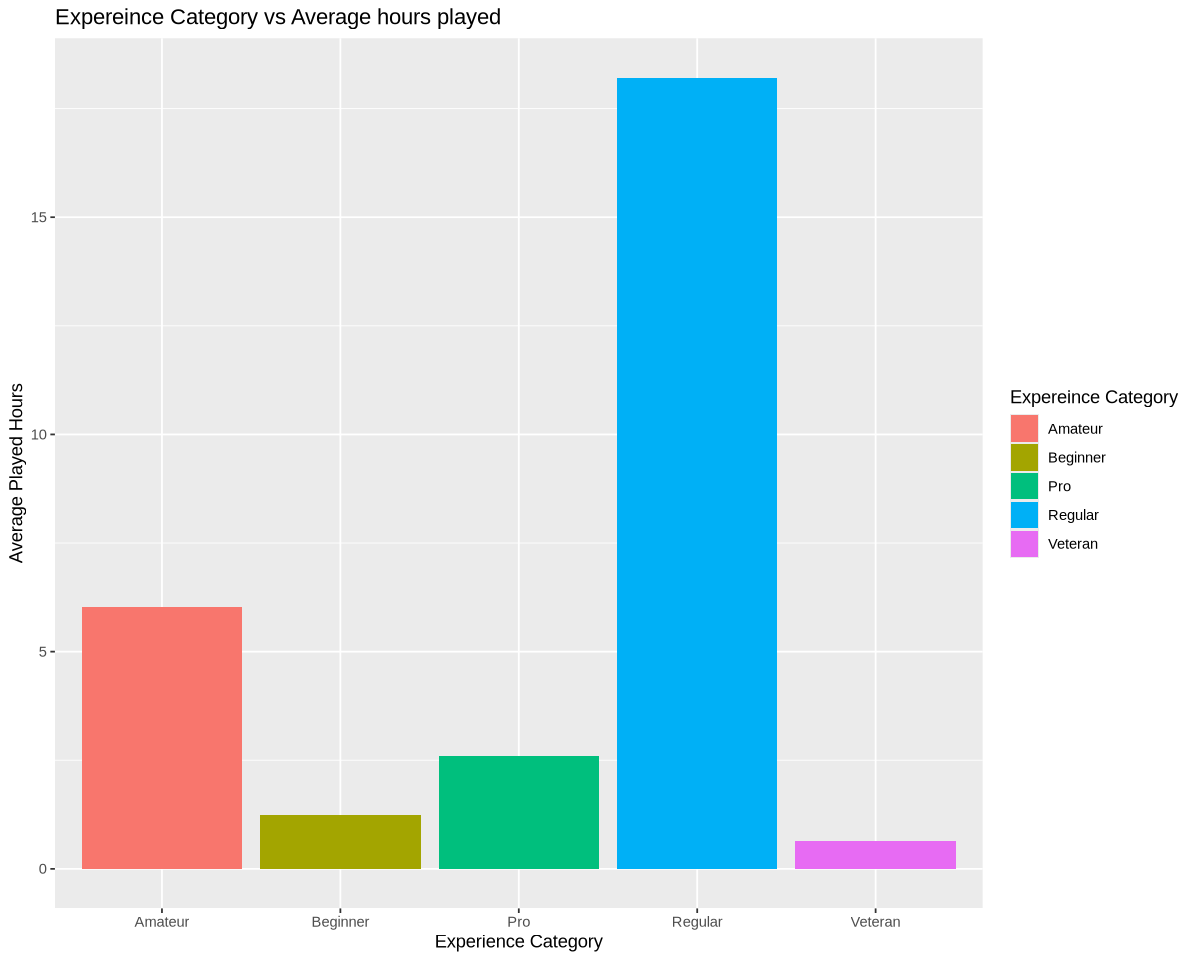

In [92]:
options(repr.plot.width = 10, repr.plot.height = 8)

#Start by grouping the experience and then finding the mean hours played for each expereince category 
players_experience <- players |>
  group_by(experience) |>
  summarize(mean_hours_exp = mean(played_hours, na.rm = TRUE))
players_experience

#Plotting the data out on a easy to view bar plot
experience_plot <- ggplot(players_experience, aes(x=experience, y= mean_hours_exp, fill = experience)) +
               geom_bar(stat= "identity")+
               labs(x= "Experience Category", y = "Average Played Hours", fill = "Expereince Category", title = "Expereince Category vs Average hours played")
experience_plot

Based on the plot above, we can see that the players with the highest average play time fall under the "Regular" experience category at 15 hours, which is much higher than second place (Amateur at around 6 hours).

Plot observation summary: Using the initnal inference by observing the plots above, we can begin to piece together which specific group in our predictors have the highest average played hours. We can use this information for future statistical inference. 